In [11]:
import warnings
warnings.filterwarnings("ignore")

from data_loader import DataLoader
from models import MODELS
from misc.evaluation_metrics import *
from attacks import *

import matplotlib.pyplot as plt

In [4]:
dl = DataLoader()
info = dl.get_info()

display(info)

,name,frequency,description,source,path
0,Electricity Transformer Data - 15 min,fifteen minutes,...,https://github.com/zhouhaoyi/ETDataset,data/electricity_transformer_15min.csv
1,Metro Interstate Human Traffic Volume,hour,Hourly Interstate 94 Westbound traffic volume ...,https://archive.ics.uci.edu/ml/datasets/Metro+...,data/Metro_Interstate_Traffic_Volume.csv
2,Beijing-Guanyuan Air-Quality,hour,This hourly data set considers 6 main air poll...,https://archive.ics.uci.edu/ml/datasets/Beijin...,data/beijing_air_quality_Data_Guanyuan_2013030...
3,Solar Generation - EnerjiSA,hour,Solar generation data of unlicenced solar cen...,https://www.kaggle.com/competitions/enerjisa-e...,data/enerjisa_solar_generation.csv


In [8]:
df = dl.load(0)
(X_train, y_train, X_test, y_test), scaler = dl.prepare_dataset(23*4,1)

print(dl.last_loaded_info["name"])
print(X_train.shape)
print(X_test.shape)
print()

model = MODELS[-1]((X_train.shape[1],X_train.shape[2]), 1)

model.summary()
# train LSTM model
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=10)

pred = model.predict(X_test)
pred = scaler.inverse_transform(pred).reshape(1,-1)[0]
y_test_inv = scaler.inverse_transform(y_test).reshape(1,-1)[0]

print("RMSE :", RMSE(y_test_inv,pred))
print("MSE :", MSE(y_test_inv,pred))
print("MAPE :", MAPE(y_test_inv,pred))

Electricity Transformer Data - 15 min
(48710, 92, 1)
(20877, 92, 1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 91, 64)            192       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 45, 64)           0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2880)              0         
                                                                 
 dense_10 (Dense)            (None, 50)                144050    
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 144,293
Trainable params: 144,293
Non

FGSM RMSE : 0.8716138796612963
FGSM MSE : 0.7597107552182167
FGSM MAPE : 16.017339024993543


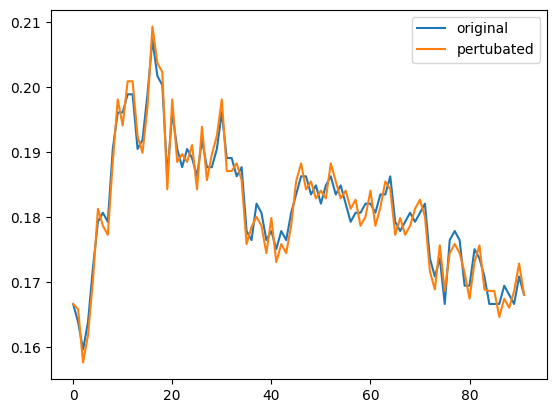

In [46]:
X_adversarial_fgsm = fgsm_attack(X_test, y_test, model, 0.002)

pred = model.predict(X_adversarial_fgsm)
pred = scaler.inverse_transform(pred).reshape(1,-1)[0]
y_test_inv = scaler.inverse_transform(y_test).reshape(1,-1)[0]

print("FGSM RMSE :", RMSE(y_test_inv,pred))
print("FGSM MSE :", MSE(y_test_inv,pred))
print("FGSM MAPE :", MAPE(y_test_inv,pred))

plt.plot(X_test[0], label = "original")
plt.plot(X_adversarial_fgsm.numpy()[0], label = "pertubated")
plt.legend()
plt.show()

PGD RMSE : 0.829163786125018
PGD MSE : 0.6875125842211746
PGD MAPE : 15.07352739218259


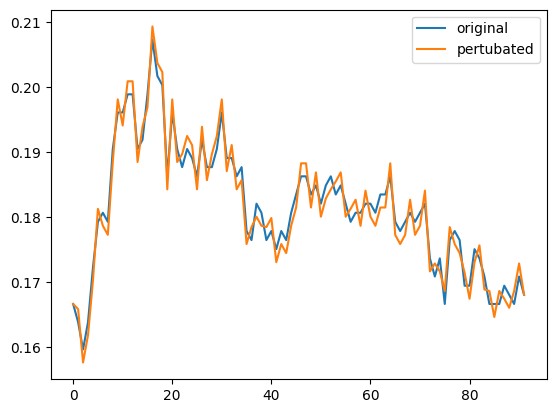

In [44]:
iterations = 10
alpha = 0.01
epsilon = 0.002
X_adversarial_pgd = pgd_attack(X_test, y_test, model, iterations, alpha, epsilon)

pred = model.predict(X_adversarial_pgd)
pred = scaler.inverse_transform(pred).reshape(1,-1)[0]
y_test_inv = scaler.inverse_transform(y_test).reshape(1,-1)[0]

print("PGD RMSE :", RMSE(y_test_inv,pred))
print("PGD MSE :", MSE(y_test_inv,pred))
print("PGD MAPE :", MAPE(y_test_inv,pred))

plt.plot(X_test[0], label = "original")
plt.plot(X_adversarial_pgd.numpy()[0], label = "pertubated")
plt.legend()
plt.show()

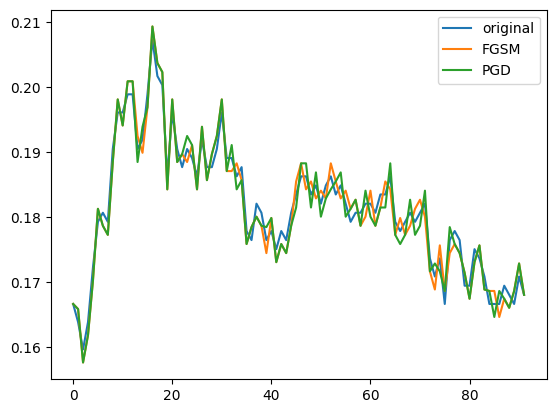

In [48]:
plt.plot(X_test[0], label = "original")
plt.plot(X_adversarial_fgsm.numpy()[0], label = "FGSM")
plt.plot(X_adversarial_pgd.numpy()[0], label = "PGD")
plt.legend()
plt.show()